In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
import jieba
warnings.filterwarnings('ignore')

In [47]:
with open('news_classify_data.txt','r',encoding='utf-8') as f:
    txt = f.readlines()
f.close()

In [48]:
text = np.array([_.split('_!_') for _ in txt])

In [49]:
text[0][0] = '6660024717287621123'

In [50]:
text[:,1] = [int(_) for _ in text[:,1]]
text[:,0] = [int(_) for _ in text[:,0]]

In [51]:
df = pd.DataFrame(text,columns = ['id','class','name','text'])

In [52]:
stop_word_f = open('ChineseStopWords.txt',encoding='utf-8')
lines = stop_word_f.readlines()
stop_word_f.close()

In [53]:
stop_list = [_[:-1] for _ in lines]

In [54]:
df['text'][0]

'老祖宗俗语：“万恶淫为首”，下一句更是精华，却没几个人能做到\n'

In [55]:
def dict_proc(data):
    data['text'] = pd.Series(' '.join(jieba.cut(_[:-1],HMM=True)) for _ in data['text'])
    return data

In [56]:
df = dict_proc(df)

In [57]:
df

,id,class,name,text
0,6660024717287621123,0,文化,老祖宗 俗语 ： “ 万恶 淫 为首 ” ， 下 一句 更是 精华 ， 却 没 几个 人能 做到
1,6675222202004013572,0,文化,老照片 ： 1907 年 ， 山东省 泰安 府
2,6679940295825555980,0,文化,亦 舒 经典语录 100 句
3,6676963806968545799,0,文化,乐山 大佛 整修 完成 ， 花脸 被 清洗 干净 ， 网友 ： 美 完容变 “ 帅 ” 了
4,6664825683656573448,0,文化,7000 年前 的 女子 ， 正值 花样年华 ， 为何 遭受 到 此 残忍 的 对待 ？
...,...,...,...,...
56816,6691485644243337735,8,国际,外媒 ： 苏丹 军队 开枪 驱散 示威者 致 9 伤 ， 军方 和 抗议者 互相 指责
56817,6691479002646839822,8,国际,特朗普 说 中国 经济 不好 ， 外交部 ： 他们 是 中国 经济 主管部门 ？
56818,6691483762988941835,8,国际,美伊 局势 升级 ， 美国会 要求 白宫 作出 解释
56819,6691481494600286727,8,国际,中国 女 留学生 在 澳 失踪 9 个 月 ， 警方 再次 呼吁 公众 协助 寻人


In [58]:
def str2list(data,stop_list):
    for idx in range(len(data['text'])):
        word_list = []
        for word in data['text'][idx].split():
            if word not in stop_list:
                word_list.append(word)
        data['text'][idx] = word_list
    return data

In [59]:
df = str2list(df,stop_list)

In [60]:
df

,id,class,name,text
0,6660024717287621123,0,文化,"[老祖宗, 俗语, 万恶, 淫, 为首, 一句, 更是, 精华, 没, 几个, 人能]"
1,6675222202004013572,0,文化,"[老照片, 1907, 年, 山东省, 泰安, 府]"
2,6679940295825555980,0,文化,"[舒, 经典语录, 100, 句]"
3,6676963806968545799,0,文化,"[乐山, 大佛, 整修, 花脸, 清洗, 干净, 网友, 美, 完容变, 帅]"
4,6664825683656573448,0,文化,"[7000, 年前, 女子, 花样年华, 遭受, 残忍]"
...,...,...,...,...
56816,6691485644243337735,8,国际,"[外媒, 苏丹, 军队, 开枪, 驱散, 示威者, 伤, 军方, 抗议者, 指责]"
56817,6691479002646839822,8,国际,"[特朗普, 说, 中国, 经济, 不好, 外交部, 中国, 经济, 主管部门]"
56818,6691483762988941835,8,国际,"[美伊, 局势, 升级, 美国会, 白宫, 作出, 解释]"
56819,6691481494600286727,8,国际,"[中国, 女, 留学生, 澳, 失踪, 月, 警方, 呼吁, 公众, 协助, 寻人]"


<AxesSubplot:xlabel='class', ylabel='count'>

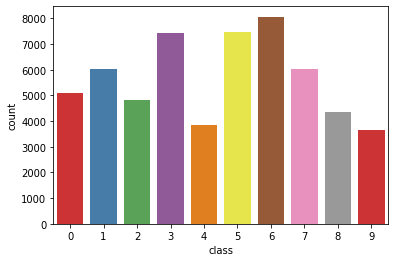

In [61]:
sns.countplot(df['class'], palette='Set1')

In [62]:
def wordFreqCount(data):
    word2idx = dict()
    idx2word = dict()
    word_freq = dict()
    word2idx['<EOS>'] = 0
    idx2word[0] = '<EOS>' 
    word2idx['<UNK>'] = 1
    idx2word[1] = '<UNK>' 
    word2idx['<Paddling>'] = 2
    idx2word[2] = '<Paddling>'
    word_freq['<Paddling>'] = 1
    word_freq['<UNK>'] = 1
    word_freq['<EOS>'] = 1
    for words in data:
        for i in words:
            word_freq[i] = word_freq.get(i,0) + 1
    return word2idx,idx2word,word_freq

In [63]:
word2idx,idx2word,word_freq = wordFreqCount(df['text'])

In [64]:
df['text'][0]

['老祖宗', '俗语', '万恶', '淫', '为首', '一句', '更是', '精华', '没', '几个', '人能']

In [65]:
import pickle
with open('word2idx.pkl','rb') as f:
    word2idx_big = pickle.load(f)
with open('idx2word.pkl','rb') as f:
    idx2word_big = pickle.load(f)

In [66]:
word_freq = dict(sorted(word_freq.items(),key = lambda x:x[1],reverse=True))

In [67]:
def worddictProc(word2idx,idx2word,word_freq,min_count = 1,max_count = 10000):
    idx = 3
    for _,(word,count) in enumerate(word_freq.items()):
        if min_count <= count <= max_count:
            word2idx[word] = idx
            idx2word[idx] = word
            idx += 1
    return word2idx,idx2word

In [68]:
for _ in idx2word.values():
    if _ not in word2idx.keys():
        print(_)

In [69]:
word2idx,idx2word = worddictProc(word2idx,idx2word,word_freq)

In [70]:
word2idx_big['<UNK>']

1

In [71]:
def seq2list(data,word2idx=word2idx):
    for index in range(len(data)):
        word_list = []
        word = data[index]
        for i in word:
            if i in word2idx.keys():
                word_list.append(word2idx[i])
            else:
                word_list.append(word2idx['<UNK>'])
        data[index] = word_list
    return data

In [72]:
df['text'] = seq2list(df['text'])

In [73]:
df

,id,class,name,text
0,6660024717287621123,0,文化,"[8654, 5638, 24533, 35049, 19133, 1228, 3987, ..."
1,6675222202004013572,0,文化,"[4176, 35050, 4, 1516, 2247, 7357]"
2,6679940295825555980,0,文化,"[11755, 35051, 150, 3115]"
3,6676963806968545799,0,文化,"[24534, 35052, 35053, 24535, 3209, 4357, 67, 7..."
4,6664825683656573448,0,文化,"[5639, 608, 97, 19134, 10539, 9499]"
...,...,...,...,...
56816,6691485644243337735,8,国际,"[1823, 5592, 2783, 17586, 69269, 30242, 3744, ..."
56817,6691479002646839822,8,国际,"[214, 31, 3, 49, 1367, 981, 3, 49, 10587]"
56818,6691483762988941835,8,国际,"[3417, 5090, 173, 23391, 7512, 4667, 1976]"
56819,6691481494600286727,8,国际,"[3, 192, 2033, 2999, 3595, 5, 974, 2172, 1646,..."


In [131]:
import pickle
f = open('word_df_1.pkl','wb')
pickle.dump(df,f)
f.close()
f = open('word2idx_1.pkl','wb')
pickle.dump(word2idx,f)
f.close()
f = open('idx2word_1.pkl','wb')
pickle.dump(idx2word,f)
f.close()

In [26]:
df

,id,class,name,text
0,6660024717287621123,0,文化,"[36791, 41822, 19097, 74858, 1645, 1438, 10549..."
1,6675222202004013572,0,文化,"[52334, 52841, 133556, 2010, 22167, 7108]"
2,6679940295825555980,0,文化,"[314914, 288253, 1171, 2359]"
3,6676963806968545799,0,文化,"[20373, 55720, 7691, 60900, 12473, 4966, 4157,..."
4,6664825683656573448,0,文化,"[9854, 1103, 1351, 181550, 1715, 21015]"
...,...,...,...,...
56816,6691485644243337735,8,国际,"[2993, 571, 9869, 21257, 8578, 5101, 7515, 553..."
56817,6691479002646839822,8,国际,"[30723, 42, 22, 62, 1928, 991, 22, 62, 2757]"
56818,6691483762988941835,8,国际,"[32988, 1667, 1830, 36824, 6698, 528, 2094]"
56819,6691481494600286727,8,国际,"[22, 1173, 4765, 4125, 9876, 19, 3812, 1329, 1..."


In [ ]:
import pickle
f = open('df_big.pkl','wb')
pickle.dump(df,f)
f.close()

In [28]:
import torch
import random
import torch.nn as nn

random.seed(1224)
np.random.seed(1224)
torch.manual_seed(1224)

In [29]:
class WordDataset(torch.utils.data.Dataset):
    def __init__(self,input_labels,pos_labels,neg_labels):
        super(WordDataset,self).__init__()
        self.input_labels = input_labels
        self.pos_labels = pos_labels
        self.neg_labels = neg_labels

    def __getitem__(self,index):
        return self.input_labels[index],self.pos_labels[index],self.neg_labels[index]
        
    def __len__(self):
        return len(self.input_labels)

In [30]:
WINDOW_SIZE = 2
def getPosSample(sentences,word_freq=word_freq):
    input_labels = []
    pos_labels = []
    neg_labels = []
    for sentence in sentences:
        for idx in range(len(sentence)):
            _ = []
            input_labels.append(sentence[idx])
            # if (idx - WINDOW_SIZE - 1) >= idx >= WINDOW_SIZE:
            #     for i in range(1,WINDOW_SIZE + 1):
            #         _.append(sentence[idx + i])
            #         _.append(sentence[idx - i])
            # else :
            for i in range(1,WINDOW_SIZE + 1):
                if idx - i >= 0:
                    _.append(sentence[idx - i])
                else :
                    _.append(2)
                if idx + i < len(sentence):
                    _.append(sentence[idx + i])
                else :
                    _.append(2)
            pos_labels.append(_)
    return np.array(input_labels),np.array(pos_labels)

In [31]:
input_labels,pos_labels = getPosSample(df['text'])

In [43]:
SAMPLE_SIZE = 2*5*WINDOW_SIZE
def getNegSample(word_freq = word_freq,input_labels=input_labels,pos_labels = pos_labels):
    proj = []
    neg_labels = []
    for i,(word,count) in enumerate(word_freq.items()):
        if word in word2idx.keys():
            _ = [word2idx[word]]*count
            proj.extend(_)
    for idx in range(len(input_labels)):
        _ = []
        while(len(_) < SAMPLE_SIZE):
            wordidx = proj[random.randint(0,len(proj) - 1)]
            if (wordidx in pos_labels[idx]) | (wordidx == input_labels[idx]):
                continue
            _.append(wordidx)
        neg_labels.append(_)
    return np.array(neg_labels)

In [44]:
neg_labels = getNegSample()

In [45]:
word_dataset = WordDataset(input_labels,pos_labels,neg_labels)

In [46]:
len(word2idx)

24529

In [47]:
len(idx2word)

24529

In [48]:
print(word_dataset[0][0].shape)
print(word_dataset[0][1].shape)
print(word_dataset[0][2].shape)

()
(4,)
(20,)


In [49]:
import pickle
f = open('word2idx.pkl','wb')
pickle.dump(word2idx,f)
f.close()

In [50]:
len(idx2word)

24529

In [51]:
f = open('idx2word.pkl','wb')
pickle.dump(idx2word,f)
f.close()

In [52]:
f = open('word_freq.pkl','wb')
pickle.dump(word_freq,f)
f.close()

In [ ]:
import pickle
f = open('df_big.pkl','rb')
word_df= pickle.load(f)
f.close()